In [38]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

In [2]:
college = pd.read_csv('ForbesAmericasTopColleges2019.csv')
college.head()

Rank                                   Name       City State  \
0     1                     Harvard University  Cambridge    MA   
1     2                    Stanford University   Stanford    CA   
2     3                        Yale University  New Haven    CT   
3     4  Massachusetts Institute of Technology  Cambridge    MA   
4     5                   Princeton University  Princeton    NJ   

  Public/Private  Undergraduate Population  Student Population  Net Price  \
0        Private                     13844               31120    14327.0   
1        Private                      8402               17534    13261.0   
2        Private                      6483               12974    18627.0   
3        Private                      4680               11466    20771.0   
4        Private                      5659                8273     9327.0   

   Average Grant Aid  Total Annual Cost  Alumni Salary  Acceptance Rate  \
0            49870.0              69600       146800.0              5.0   
1            50134.0              69109       145200.0              5.0   
2            50897.0              71290       138300.0              7.0   
3            43248.0              67430       155200.0              7.0   
4            48088.0              66150       139400.0              6.0   

   SAT Lower  SAT Upper  ACT Lower  ACT Upper            Website  
0     1460.0     1590.0       32.0       35.0    www.harvard.edu  
1     1390.0     1540.0       32.0       35.0   www.stanford.edu  
2     1460.0     1580.0       32.0       35.0       www.yale.edu  
3     1490.0     1570.0       33.0       35.0        web.mit.edu  
4     1430.0     1570.0       31.0       35.0  www.princeton.edu

In [3]:
college.shape

(650, 17)

In [4]:
print('The Number of Rows in the Dataset are',college.shape[0],'\nThe Number of Columns in the Dataset are ',college.shape[1])

The Number of Rows in the Dataset are 650 
The Number of Columns in the Dataset are  17


In [5]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rank                      650 non-null    int64  
 1   Name                      650 non-null    object 
 2   City                      647 non-null    object 
 3   State                     650 non-null    object 
 4   Public/Private            650 non-null    object 
 5   Undergraduate Population  650 non-null    int64  
 6   Student Population        650 non-null    int64  
 7   Net Price                 648 non-null    float64
 8   Average Grant Aid         646 non-null    float64
 9   Total Annual Cost         650 non-null    int64  
 10  Alumni Salary             635 non-null    float64
 11  Acceptance Rate           648 non-null    float64
 12  SAT Lower                 551 non-null    float64
 13  SAT Upper                 551 non-null    float64
 14  ACT Lower 

In [6]:
college.isnull().sum()

Rank                         0
Name                         0
City                         3
State                        0
Public/Private               0
Undergraduate Population     0
Student Population           0
Net Price                    2
Average Grant Aid            4
Total Annual Cost            0
Alumni Salary               15
Acceptance Rate              2
SAT Lower                   99
SAT Upper                   99
ACT Lower                   97
ACT Upper                   97
Website                      5
dtype: int64

In [7]:
college.drop(['Website', 'SAT Lower','SAT Upper','ACT Lower','ACT Upper'], axis=1, inplace=True)

### These are droppped since there are so many missing variables and these impact everything

In [8]:
college.dropna(inplace=True)

In [9]:
college.head()

Rank                                   Name       City State  \
0     1                     Harvard University  Cambridge    MA   
1     2                    Stanford University   Stanford    CA   
2     3                        Yale University  New Haven    CT   
3     4  Massachusetts Institute of Technology  Cambridge    MA   
4     5                   Princeton University  Princeton    NJ   

  Public/Private  Undergraduate Population  Student Population  Net Price  \
0        Private                     13844               31120    14327.0   
1        Private                      8402               17534    13261.0   
2        Private                      6483               12974    18627.0   
3        Private                      4680               11466    20771.0   
4        Private                      5659                8273     9327.0   

   Average Grant Aid  Total Annual Cost  Alumni Salary  Acceptance Rate  
0            49870.0              69600       146800.0              5.0  
1            50134.0              69109       145200.0              5.0  
2            50897.0              71290       138300.0              7.0  
3            43248.0              67430       155200.0              7.0  
4            48088.0              66150       139400.0              6.0

In [10]:
college.Name.head()

0                       Harvard University
1                      Stanford University
2                          Yale University
3    Massachusetts Institute of Technology
4                     Princeton University
Name: Name, dtype: object

In [11]:
top5 = college.Name.head()
top5

0                       Harvard University
1                      Stanford University
2                          Yale University
3    Massachusetts Institute of Technology
4                     Princeton University
Name: Name, dtype: object

In [36]:
college.loc[:4,['Name','City','State','Acceptance Rate']]

Name       City State  Acceptance Rate
0                     Harvard University  Cambridge    MA              5.0
1                    Stanford University   Stanford    CA              5.0
2                        Yale University  New Haven    CT              7.0
3  Massachusetts Institute of Technology  Cambridge    MA              7.0
4                   Princeton University  Princeton    NJ              6.0

In [13]:
college.iloc[0:5,0:4]

Rank                                   Name       City State
0     1                     Harvard University  Cambridge    MA
1     2                    Stanford University   Stanford    CA
2     3                        Yale University  New Haven    CT
3     4  Massachusetts Institute of Technology  Cambridge    MA
4     5                   Princeton University  Princeton    NJ

In [14]:
print(college.State.nunique())
print(college.State.unique())

51
['MA' 'CA' 'CT' 'NJ' 'PA' 'RI' 'NC' 'NH' 'NY' 'DC' 'IL' 'IN' 'MI' 'TX'
 'MD' 'ME' 'TN' 'MO' 'VA' 'VT' 'MN' 'GA' 'WA' 'WI' 'FL' 'OH' 'IA' 'CO'
 'UT' 'OR' 'LA' 'SC' 'DE' 'AL' 'AZ' 'OK' 'NE' 'KY' 'KS' 'AR' 'WY' 'NV'
 'MS' 'ND' 'HI' 'MT' 'SD' 'NM' 'ID' 'WV' 'AK']


In [15]:
college.groupby('Public/Private').count().Name

Public/Private
Private    381
Public     244
Name: Name, dtype: int64

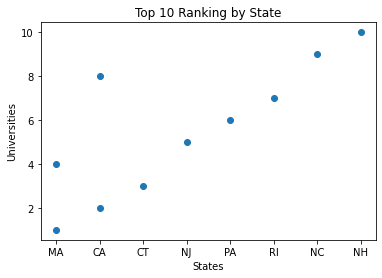

In [45]:
college11= college1.head(10)
plt.scatter(college11.State,college11.Rank)
plt.xlabel('States')
plt.ylabel('Universities')
plt.title('Top 10 Ranking by State')
plt.show()

In [16]:
college.groupby('State').nunique().Name.sort_values(ascending=False)

State
NY    64
CA    55
PA    39
MA    30
OH    29
IL    25
TX    25
FL    20
NC    19
VA    18
IN    18
MN    18
MI    16
GA    14
TN    14
NJ    13
IA    13
WI    13
WA    12
KY    12
MO    12
MD    11
CO    11
OR    11
CT     9
LA     8
SC     8
AL     7
RI     7
NE     6
OK     6
MS     5
DC     5
ME     5
AZ     4
MT     4
ID     4
SD     4
UT     4
VT     4
AR     4
KS     3
NH     3
NM     3
AK     2
ND     2
NV     2
DE     1
HI     1
WV     1
WY     1
Name: Name, dtype: int64

In [17]:
college.groupby('State').nunique().Name.sort_values(ascending=False).head(1)

State
NY    64
Name: Name, dtype: int64

In [18]:
college['Percentage UG']=round(college['Undergraduate Population']*100/college['Student Population'],2)

In [19]:
college

Rank                                   Name         City State  \
0       1                     Harvard University    Cambridge    MA   
1       2                    Stanford University     Stanford    CA   
2       3                        Yale University    New Haven    CT   
3       4  Massachusetts Institute of Technology    Cambridge    MA   
4       5                   Princeton University    Princeton    NJ   
..    ...                                    ...          ...   ...   
644   645                      Morehouse College      Atlanta    GA   
645   646            New Mexico State University   Las Cruces    NM   
646   647               Indiana State University  Terre Haute    IN   
647   648              Emory &amp; Henry College        Emory    VA   
649   650                        Catawba College    Salisbury    NC   

    Public/Private  Undergraduate Population  Student Population  Net Price  \
0          Private                     13844               31120    14327.0   
1          Private                      8402               17534    13261.0   
2          Private                      6483               12974    18627.0   
3          Private                      4680               11466    20771.0   
4          Private                      5659                8273     9327.0   
..             ...                       ...                 ...        ...   
644        Private                      2202                2219    34928.0   
645         Public                     13379               14432     8625.0   
646         Public                     13626               13763    13012.0   
647        Private                      1094                1226    19340.0   
649        Private                      1336                1463    19807.0   

     Average Grant Aid  Total Annual Cost  Alumni Salary  Acceptance Rate  \
0              49870.0              69600       146800.0              5.0   
1              50134.0              69109       145200.0              5.0   
2              50897.0              71290       138300.0              7.0   
3              43248.0              67430       155200.0              7.0   
4              48088.0              66150       139400.0              6.0   
..                 ...                ...            ...              ...   
644            17318.0              48723        98700.0             74.0   
645             9582.0              34720        96700.0             64.0   
646             9297.0              32938        85600.0             85.0   
647            27155.0              48100        70700.0             72.0   
649            23662.0              44921        78100.0             42.0   

     Percentage UG  
0            44.49  
1            47.92  
2            49.97  
3            40.82  
4            68.40  
..             ...  
644          99.23  
645          92.70  
646          99.00  
647          89.23  
649          91.32  

[625 rows x 13 columns]

In [20]:
college.sort_values(by='Percentage UG').tail(5).Name

345                       St. Norbert College
364                      Salisbury University
253              Saint John's University (MN)
565                        Oakland University
570    University of Texas, Rio Grande Valley
Name: Name, dtype: object

In [21]:
college[['Name','Percentage UG']].sort_values(by='Percentage UG', ascending = False).head(5)

Name  Percentage UG
570  University of Texas, Rio Grande Valley          99.99
253            Saint John's University (MN)          99.94
565                      Oakland University          99.94
364                    Salisbury University          99.92
345                     St. Norbert College          99.86

In [22]:
college.sort_values(by='Average Grant Aid').tail(5).Name

13    Columbia University
27        Amherst College
0      Harvard University
1     Stanford University
2         Yale University
Name: Name, dtype: object

In [23]:
college[['Name','Average Grant Aid']].sort_values(by='Average Grant Aid', ascending = False).head(5)

Name  Average Grant Aid
2       Yale University            50897.0
1   Stanford University            50134.0
0    Harvard University            49870.0
27      Amherst College            49467.0
13  Columbia University            49185.0

In [24]:
college.sort_values(by='Acceptance Rate').tail(5).Name

307                University of Kentucky
637               Wright State University
346                 University of Wyoming
626    University of Southern Mississippi
605          University of Texas, El Paso
Name: Name, dtype: object

In [25]:
college.sort_values(by='Acceptance Rate', ascending = False).head(5)

Rank                                Name         City State  \
605   606        University of Texas, El Paso      El Paso    TX   
626   627  University of Southern Mississippi  Hattiesburg    MS   
346   347               University of Wyoming      Laramie    WY   
637   638             Wright State University       Dayton    OH   
307   308              University of Kentucky    Lexington    KY   

    Public/Private  Undergraduate Population  Student Population  Net Price  \
605         Public                     24386               25078     8135.0   
626         Public                     13606               14478    13178.0   
346         Public                     10874               12397    13070.0   
637         Public                     14332               15957    16249.0   
307         Public                     23718               29465    18527.0   

     Average Grant Aid  Total Annual Cost  Alumni Salary  Acceptance Rate  \
605             9183.0              36955        92100.0            100.0   
626             9292.0              24883        83900.0             98.0   
346             7422.0              31387        98800.0             97.0   
637             6546.0              32506        87800.0             97.0   
307             9387.0              45634        96400.0             96.0   

     Percentage UG  
605          97.24  
626          93.98  
346          87.71  
637          89.82  
307          80.50

In [48]:
college.sort_values(by='Percentage UG', ascending = False).head(5)

Rank                                    Name          City State  \
570   571  University of Texas, Rio Grande Valley      Edinburg    TX   
253   254            Saint John's University (MN)  Collegeville    MN   
565   566                      Oakland University     Rochester    MI   
364   365                    Salisbury University     Salisbury    MD   
345   346                     St. Norbert College       De Pere    WI   

    Public/Private  Undergraduate Population  Student Population  Net Price  \
570         Public                     27807               27809     3901.0   
253        Private                      1815                1816    23977.0   
565         Public                     19321               19333    12779.0   
364         Public                      8714                8721    18792.0   
345        Private                      2162                2165    24930.0   

     Average Grant Aid  Total Annual Cost  Alumni Salary  Acceptance Rate  \
570             9398.0              29995        81200.0             80.0   
253            27780.0              55872       108400.0             80.0   
565             9476.0              36581        93300.0             84.0   
364             5527.0              34102        89800.0             65.0   
345            20123.0              48110        88700.0             79.0   

     Percentage UG  
570          99.99  
253          99.94  
565          99.94  
364          99.92  
345          99.86

In [46]:
college.sort_values(by='Acceptance Rate', ascending = True).head(5)

Rank                  Name       City State Public/Private  \
0       1    Harvard University  Cambridge    MA        Private   
1       2   Stanford University   Stanford    CA        Private   
4       5  Princeton University  Princeton    NJ        Private   
118   119  The Juilliard School   New York    NY        Private   
2       3       Yale University  New Haven    CT        Private   

     Undergraduate Population  Student Population  Net Price  \
0                       13844               31120    14327.0   
1                        8402               17534    13261.0   
4                        5659                8273     9327.0   
118                       590                 927    32829.0   
2                        6483               12974    18627.0   

     Average Grant Aid  Total Annual Cost  Alumni Salary  Acceptance Rate  \
0              49870.0              69600       146800.0              5.0   
1              50134.0              69109       145200.0              5.0   
4              48088.0              66150       139400.0              6.0   
118            29417.0              62600        97400.0              6.0   
2              50897.0              71290       138300.0              7.0   

     Percentage UG  
0            44.49  
1            47.92  
4            68.40  
118          63.65  
2            49.97

In [47]:
college.sort_values(by='Percentage UG', ascending = True).head(5)

Rank                          Name                   City State  \
479   480  Nova Southeastern University  Fort-Lauderdale-Davie    FL   
13     14           Columbia University               New York    NY   
349   350               Simmons College                 Boston    MA   
505   506            Webster University              St. Louis    MO   
21     22      Johns Hopkins University              Baltimore    MD   

    Public/Private  Undergraduate Population  Student Population  Net Price  \
479        Private                      4840               20793    26606.0   
13         Private                      8523               30454    24231.0   
349        Private                      1825                6283    28308.0   
505        Private                      3732               12736    22937.0   
21         Private                      7825               25151    33586.0   

     Average Grant Aid  Total Annual Cost  Alumni Salary  Acceptance Rate  \
479            19075.0              49149        89800.0             58.0   
13             49185.0              74199       126800.0              7.0   
349            26660.0              58230        94300.0             60.0   
505            17927.0              44962        83500.0             54.0   
21             38542.0              69863       117100.0             13.0   

     Percentage UG  
479          23.28  
13           27.99  
349          29.05  
505          29.30  
21           31.11

In [26]:
Sal_bucket=list(np.linspace(college['Alumni Salary'].min(),college['Alumni Salary'].max(),4))

In [27]:
Sal_bucket

[70700.0, 99866.66666666667, 129033.33333333334, 158200.0]

In [28]:
college[(college['Alumni Salary']>=Sal_bucket[2])&(college['Alumni Salary']<Sal_bucket[3])].head()

Rank                                   Name       City State  \
0     1                     Harvard University  Cambridge    MA   
1     2                    Stanford University   Stanford    CA   
2     3                        Yale University  New Haven    CT   
3     4  Massachusetts Institute of Technology  Cambridge    MA   
4     5                   Princeton University  Princeton    NJ   

  Public/Private  Undergraduate Population  Student Population  Net Price  \
0        Private                     13844               31120    14327.0   
1        Private                      8402               17534    13261.0   
2        Private                      6483               12974    18627.0   
3        Private                      4680               11466    20771.0   
4        Private                      5659                8273     9327.0   

   Average Grant Aid  Total Annual Cost  Alumni Salary  Acceptance Rate  \
0            49870.0              69600       146800.0              5.0   
1            50134.0              69109       145200.0              5.0   
2            50897.0              71290       138300.0              7.0   
3            43248.0              67430       155200.0              7.0   
4            48088.0              66150       139400.0              6.0   

   Percentage UG  
0          44.49  
1          47.92  
2          49.97  
3          40.82  
4          68.40

In [29]:
college1=college.copy()

In [30]:
college1['Alumni Sal Level'] = pd.cut(x=college1['Alumni Salary'], bins=Sal_bucket,labels=['L','M','H'])

In [31]:
college1

Rank                                   Name         City State  \
0       1                     Harvard University    Cambridge    MA   
1       2                    Stanford University     Stanford    CA   
2       3                        Yale University    New Haven    CT   
3       4  Massachusetts Institute of Technology    Cambridge    MA   
4       5                   Princeton University    Princeton    NJ   
..    ...                                    ...          ...   ...   
644   645                      Morehouse College      Atlanta    GA   
645   646            New Mexico State University   Las Cruces    NM   
646   647               Indiana State University  Terre Haute    IN   
647   648              Emory &amp; Henry College        Emory    VA   
649   650                        Catawba College    Salisbury    NC   

    Public/Private  Undergraduate Population  Student Population  Net Price  \
0          Private                     13844               31120    14327.0   
1          Private                      8402               17534    13261.0   
2          Private                      6483               12974    18627.0   
3          Private                      4680               11466    20771.0   
4          Private                      5659                8273     9327.0   
..             ...                       ...                 ...        ...   
644        Private                      2202                2219    34928.0   
645         Public                     13379               14432     8625.0   
646         Public                     13626               13763    13012.0   
647        Private                      1094                1226    19340.0   
649        Private                      1336                1463    19807.0   

     Average Grant Aid  Total Annual Cost  Alumni Salary  Acceptance Rate  \
0              49870.0              69600       146800.0              5.0   
1              50134.0              69109       145200.0              5.0   
2              50897.0              71290       138300.0              7.0   
3              43248.0              67430       155200.0              7.0   
4              48088.0              66150       139400.0              6.0   
..                 ...                ...            ...              ...   
644            17318.0              48723        98700.0             74.0   
645             9582.0              34720        96700.0             64.0   
646             9297.0              32938        85600.0             85.0   
647            27155.0              48100        70700.0             72.0   
649            23662.0              44921        78100.0             42.0   

     Percentage UG Alumni Sal Level  
0            44.49                H  
1            47.92                H  
2            49.97                H  
3            40.82                H  
4            68.40                H  
..             ...              ...  
644          99.23                L  
645          92.70                L  
646          99.00                L  
647          89.23              NaN  
649          91.32                L  

[625 rows x 14 columns]

Alumni Sal Level
L    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
H    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

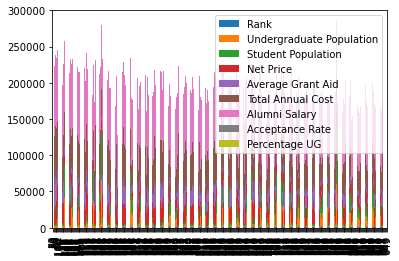

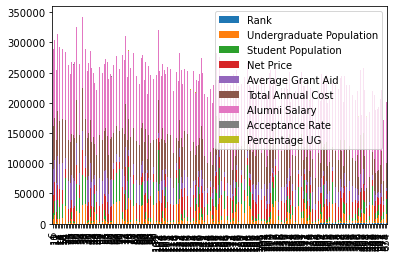

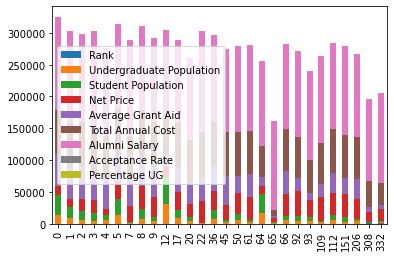

In [37]:
college1.groupby(['Alumni Sal Level']).plot.bar(stacked=True)

In [32]:
college1['Alumni Sal Level'].value_counts()

L    379
M    217
H     28
Name: Alumni Sal Level, dtype: int64

In [33]:
college1.groupby('Alumni Sal Level')['Alumni Salary'].mean()

Alumni Sal Level
L     89912.137203
M    109086.635945
H    137575.000000
Name: Alumni Salary, dtype: float64

In [34]:
high_salary_college=college1[college1['Alumni Sal Level']=='H']
high_salary_college.head()

Rank                                   Name       City State  \
0     1                     Harvard University  Cambridge    MA   
1     2                    Stanford University   Stanford    CA   
2     3                        Yale University  New Haven    CT   
3     4  Massachusetts Institute of Technology  Cambridge    MA   
4     5                   Princeton University  Princeton    NJ   

  Public/Private  Undergraduate Population  Student Population  Net Price  \
0        Private                     13844               31120    14327.0   
1        Private                      8402               17534    13261.0   
2        Private                      6483               12974    18627.0   
3        Private                      4680               11466    20771.0   
4        Private                      5659                8273     9327.0   

   Average Grant Aid  Total Annual Cost  Alumni Salary  Acceptance Rate  \
0            49870.0              69600       146800.0              5.0   
1            50134.0              69109       145200.0              5.0   
2            50897.0              71290       138300.0              7.0   
3            43248.0              67430       155200.0              7.0   
4            48088.0              66150       139400.0              6.0   

   Percentage UG Alumni Sal Level  
0          44.49                H  
1          47.92                H  
2          49.97                H  
3          40.82                H  
4          68.40                H

Rank
1      AxesSubplot(0.125,0.125;0.775x0.755)
2      AxesSubplot(0.125,0.125;0.775x0.755)
3      AxesSubplot(0.125,0.125;0.775x0.755)
4      AxesSubplot(0.125,0.125;0.775x0.755)
5      AxesSubplot(0.125,0.125;0.775x0.755)
6      AxesSubplot(0.125,0.125;0.775x0.755)
8      AxesSubplot(0.125,0.125;0.775x0.755)
9      AxesSubplot(0.125,0.125;0.775x0.755)
10     AxesSubplot(0.125,0.125;0.775x0.755)
13     AxesSubplot(0.125,0.125;0.775x0.755)
18     AxesSubplot(0.125,0.125;0.775x0.755)
21     AxesSubplot(0.125,0.125;0.775x0.755)
23     AxesSubplot(0.125,0.125;0.775x0.755)
37     AxesSubplot(0.125,0.125;0.775x0.755)
46     AxesSubplot(0.125,0.125;0.775x0.755)
51     AxesSubplot(0.125,0.125;0.775x0.755)
62     AxesSubplot(0.125,0.125;0.775x0.755)
65     AxesSubplot(0.125,0.125;0.775x0.755)
66     AxesSubplot(0.125,0.125;0.775x0.755)
67     AxesSubplot(0.125,0.125;0.775x0.755)
93     AxesSubplot(0.125,0.125;0.775x0.755)
94     AxesSubplot(0.125,0.125;0.775x0.755)
110    AxesSubplot(0.125,0.

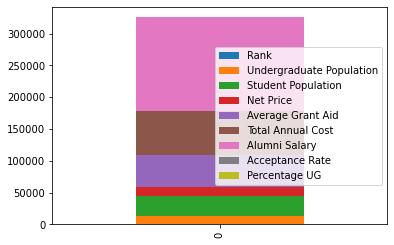

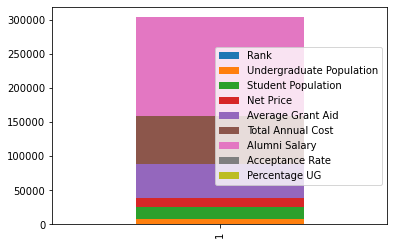

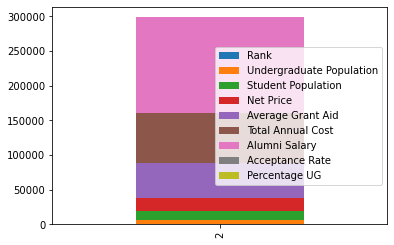

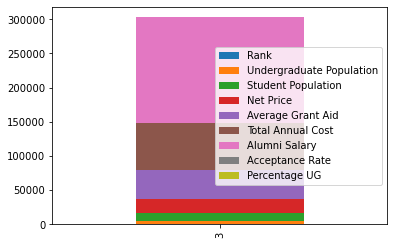

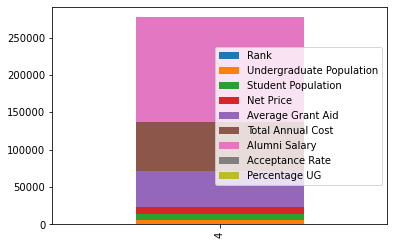

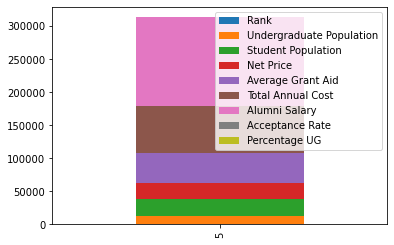

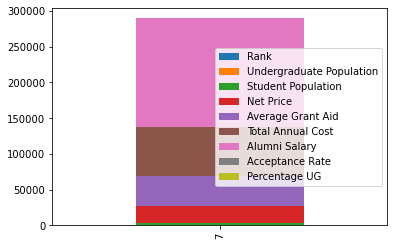

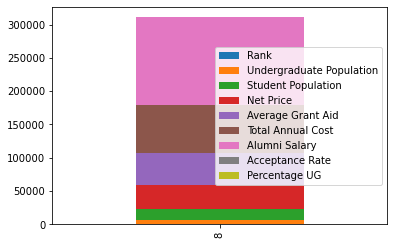

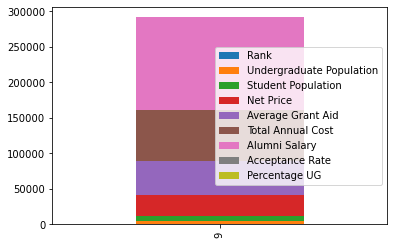

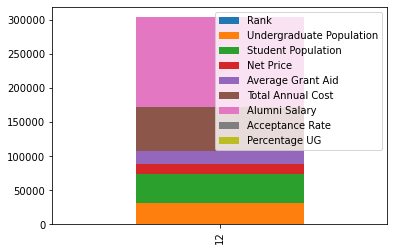

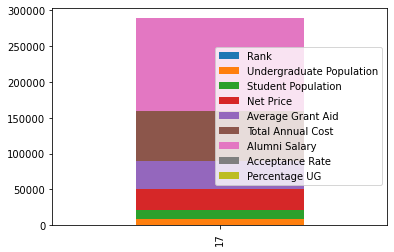

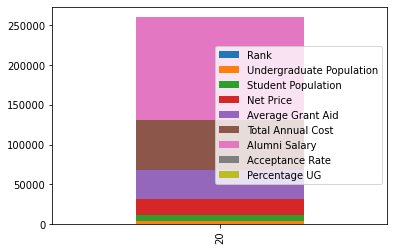

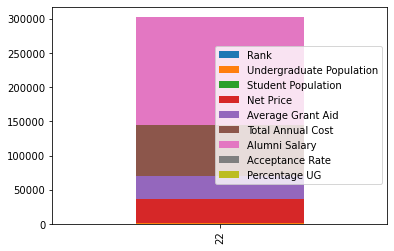

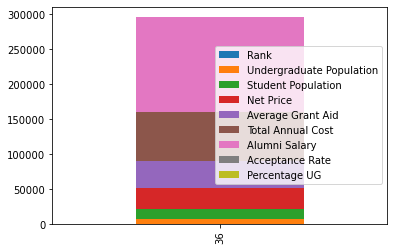

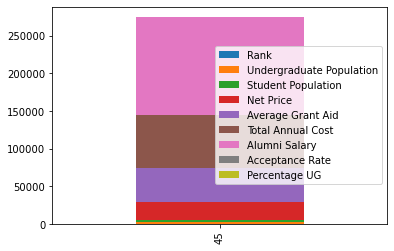

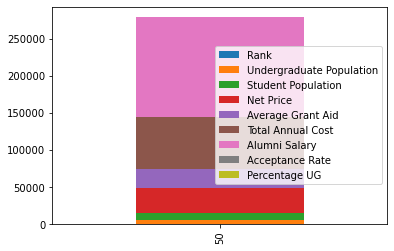

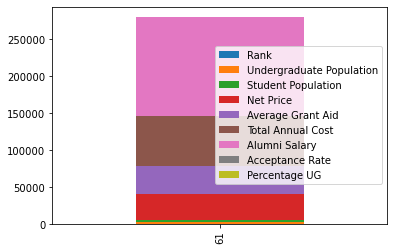

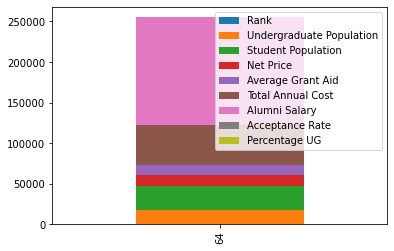

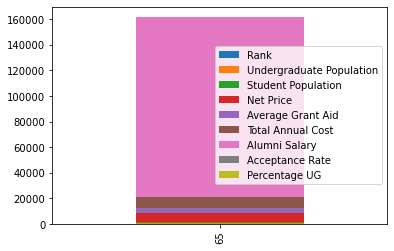

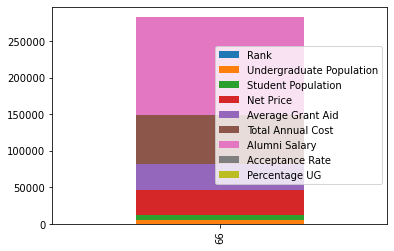

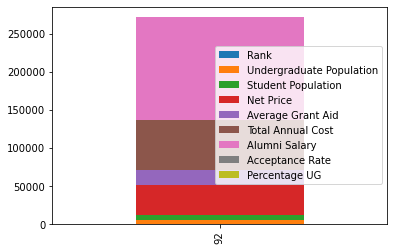

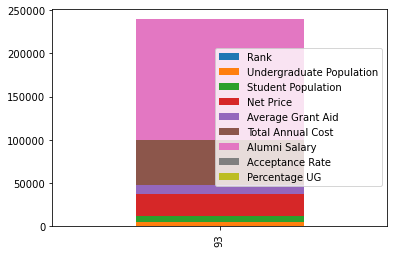

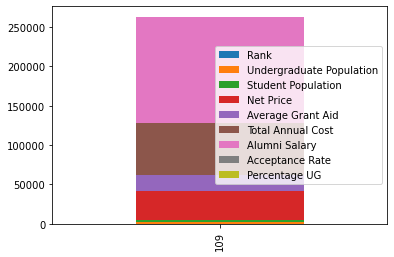

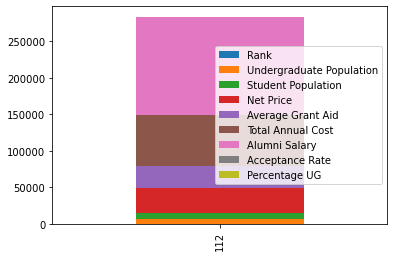

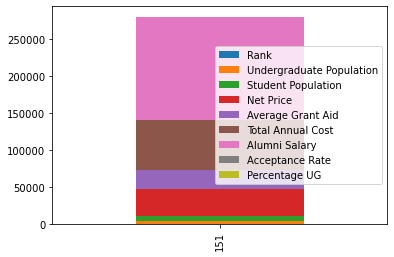

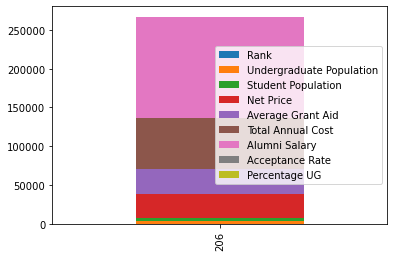

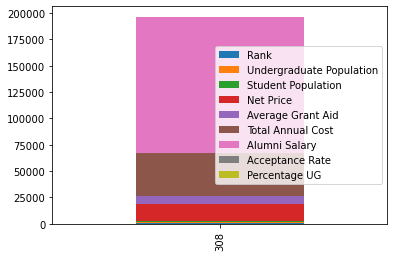

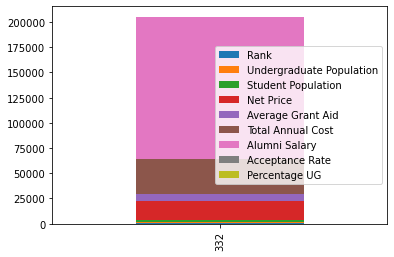

In [63]:
high_salary_college.groupby(['Rank']).plot.bar(stacked=True)

In [35]:
high_salary_college.describe(include='all').T

count unique                   top freq     mean  \
Rank                        28    NaN                   NaN  NaN  68.8571   
Name                        28     28  Princeton University    1      NaN   
City                        28     27             Cambridge    2      NaN   
State                       28     12                    CA    6      NaN   
Public/Private              28      2               Private   22      NaN   
Undergraduate Population    28    NaN                   NaN  NaN  6389.54   
Student Population          28    NaN                   NaN  NaN  10603.3   
Net Price                   28    NaN                   NaN  NaN  25288.6   
Average Grant Aid           28    NaN                   NaN  NaN  32340.5   
Total Annual Cost           28    NaN                   NaN  NaN  62952.5   
Alumni Salary               28    NaN                   NaN  NaN   137575   
Acceptance Rate             28    NaN                   NaN  NaN  28.0357   
Percentage UG               28    NaN                   NaN  NaN  68.7039   
Alumni Sal Level            28      1                     H   28      NaN   

                              std     min      25%      50%      75%     max  
Rank                      87.5001       1     8.75     41.5    93.25     333  
Name                          NaN     NaN      NaN      NaN      NaN     NaN  
City                          NaN     NaN      NaN      NaN      NaN     NaN  
State                         NaN     NaN      NaN      NaN      NaN     NaN  
Public/Private                NaN     NaN      NaN      NaN      NaN     NaN  
Undergraduate Population  6290.91     847     2759     4752  7001.75   31133  
Student Population        10225.9     861     3253   7019.5  13197.8   41891  
Net Price                 9526.08    6758  17913.8  24977.5    34275   40376  
Average Grant Aid         14681.9    3597    20604  36200.5  44877.8   50897  
Total Annual Cost         14203.5    8646    65024    67931  69918.5   74428  
Alumni Salary             7667.57  129500   132025   135100   140100  158200  
Acceptance Rate           21.4898       5     9.75       22       45      69  
Percentage UG             19.0947   40.82    50.03   69.785  80.0725    99.6  
Alumni Sal Level              NaN     NaN      NaN      NaN      NaN     NaN

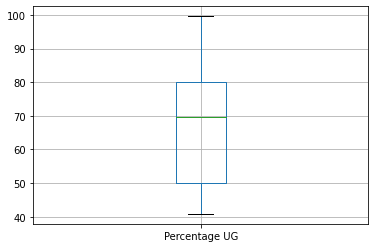

In [41]:
high_salary_college.boxplot(column='Percentage UG')
plt.show ()

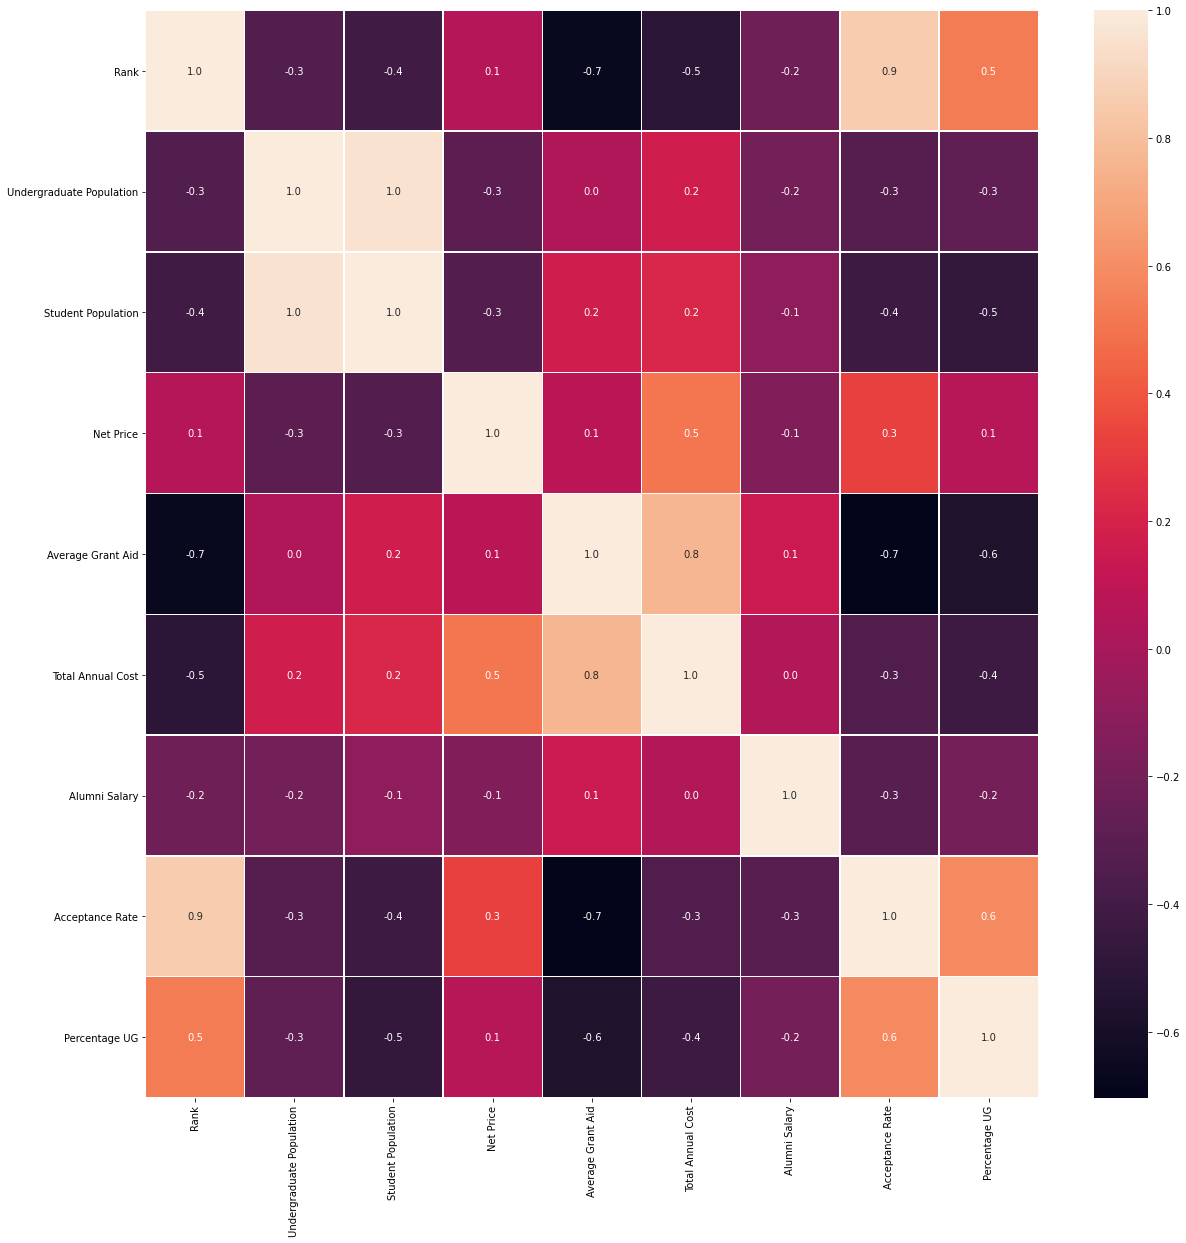

In [55]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(high_salary_college.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [49]:
med_salary_college=college1[college1['Alumni Sal Level']=='M']
med_salary_college.head()

Rank                   Name        City State Public/Private  \
6      7       Brown University  Providence    RI        Private   
10    11     Cornell University      Ithaca    NY        Private   
11    12         Pomona College   Claremont    CA        Private   
13    14    Columbia University    New York    NY        Private   
14    15  Georgetown University  Washington    DC        Private   

    Undergraduate Population  Student Population  Net Price  \
6                       7390               10095    30205.0   
10                     14774               23016    31230.0   
11                      1599                1665    15840.0   
13                      8523               30454    24231.0   
14                      8194               19005    30107.0   

    Average Grant Aid  Total Annual Cost  Alumni Salary  Acceptance Rate  \
6             42455.0              71050       127600.0              8.0   
10            36164.0              70321       128200.0             13.0   
11            48930.0              69725       117200.0              8.0   
13            49185.0              74199       126800.0              7.0   
14            41893.0              71580       122200.0             16.0   

    Percentage UG Alumni Sal Level  
6           73.20                M  
10          64.19                M  
11          96.04                M  
13          27.99                M  
14          43.11                M

In [50]:
med_salary_college.describe(include='all').T

count unique  \
Rank                       217    NaN   
Name                       217    217   
City                       217    172   
State                      217     41   
Public/Private             217      2   
Undergraduate Population   217    NaN   
Student Population         217    NaN   
Net Price                  217    NaN   
Average Grant Aid          217    NaN   
Total Annual Cost          217    NaN   
Alumni Salary              217    NaN   
Acceptance Rate            217    NaN   
Percentage UG              217    NaN   
Alumni Sal Level           217      1   

                                                               top freq  \
Rank                                                           NaN  NaN   
Name                      North Carolina State University, Raleigh    1   
City                                                      New York    9   
State                                                           NY   30   
Public/Private                                             Private  137   
Undergraduate Population                                       NaN  NaN   
Student Population                                             NaN  NaN   
Net Price                                                      NaN  NaN   
Average Grant Aid                                              NaN  NaN   
Total Annual Cost                                              NaN  NaN   
Alumni Salary                                                  NaN  NaN   
Acceptance Rate                                                NaN  NaN   
Percentage UG                                                  NaN  NaN   
Alumni Sal Level                                                 M  217   

                             mean      std    min     25%     50%     75%  \
Rank                      185.461   130.68      7      83     159     268   
Name                          NaN      NaN    NaN     NaN     NaN     NaN   
City                          NaN      NaN    NaN     NaN     NaN     NaN   
State                         NaN      NaN    NaN     NaN     NaN     NaN   
Public/Private                NaN      NaN    NaN     NaN     NaN     NaN   
Undergraduate Population  12104.2  12100.7    848    2545    6424   19476   
Student Population        15399.6  14854.5    864    2855    9618   25057   
Net Price                 25131.2  8395.03   2695   18378   25007   31592   
Average Grant Aid         23057.6  12017.7   4230   10998   22438   31570   
Total Annual Cost         57059.2  11793.5  18370   47518   59560   67392   
Alumni Salary              109087  7060.72  99900  103200  107300  114000   
Acceptance Rate           52.2074  22.9625      7      34      54      72   
Percentage UG             81.8981  15.1178  27.99    73.2   85.02   94.24   
Alumni Sal Level              NaN      NaN    NaN     NaN     NaN     NaN   

                             max  
Rank                         635  
Name                         NaN  
City                         NaN  
State                        NaN  
Public/Private               NaN  
Undergraduate Population   53515  
Student Population         67929  
Net Price                  46277  
Average Grant Aid          49467  
Total Annual Cost          75735  
Alumni Salary             128200  
Acceptance Rate               92  
Percentage UG              99.94  
Alumni Sal Level             NaN

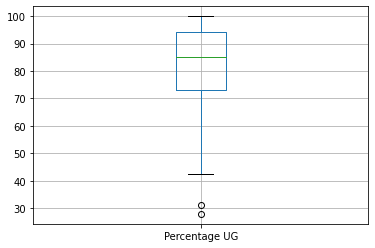

In [51]:
med_salary_college.boxplot(column='Percentage UG')
plt.show ()

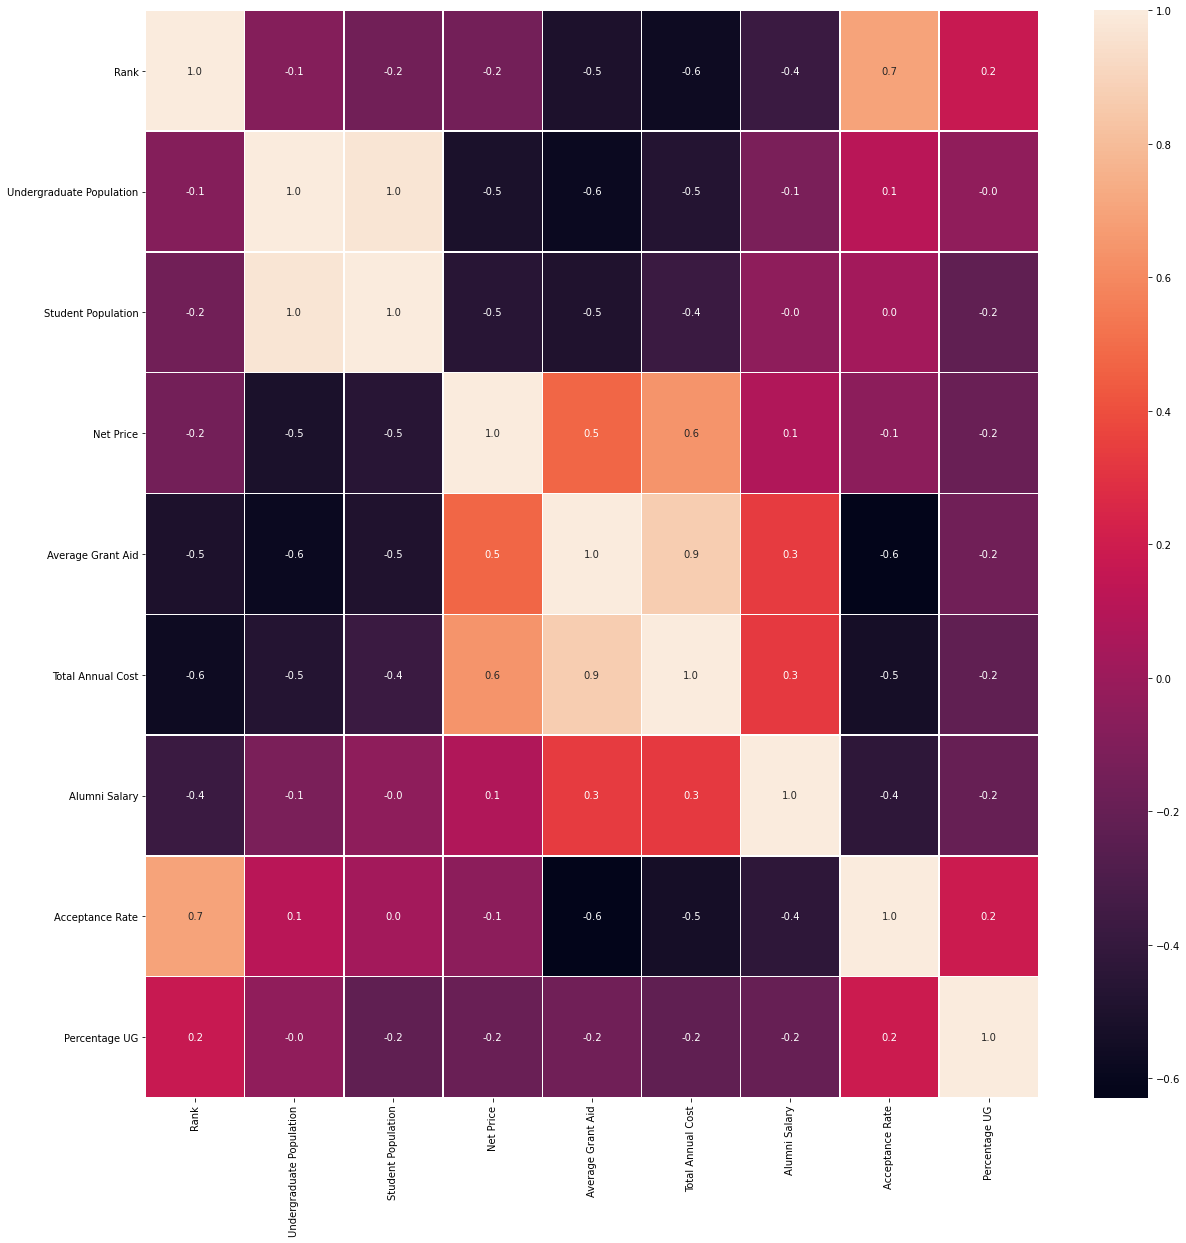

In [56]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(med_salary_college.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [52]:
low_salary_college=college1[college1['Alumni Sal Level']=='L']
low_salary_college.head()

Rank              Name         City State Public/Private  \
53    54    Pitzer College    Claremont    CA        Private   
59    60   Scripps College    Claremont    CA        Private   
79    80  Grinnell College     Grinnell    IA        Private   
80    81     Smith College  Northampton    MA        Private   
84    85   Oberlin College      Oberlin    OH        Private   

    Undergraduate Population  Student Population  Net Price  \
53                      1074                1087    28423.0   
59                      1083                1092    30974.0   
79                      1712                1765    22844.0   
80                      2594                2918    24829.0   
84                      2853                3030    31331.0   

    Average Grant Aid  Total Annual Cost  Alumni Salary  Acceptance Rate  \
53            41257.0              70500        96600.0             16.0   
59            31633.0              71060        98600.0             33.0   
79            33946.0              66214        96500.0             29.0   
80            39913.0              69563        98200.0             32.0   
84            28876.0              71330        96800.0             34.0   

    Percentage UG Alumni Sal Level  
53          98.80                L  
59          99.18                L  
79          97.00                L  
80          88.90                L  
84          94.16                L

In [53]:
low_salary_college.describe(include='all').T

count unique                       top freq     mean  \
Rank                       379    NaN                       NaN  NaN  417.844   
Name                       379    379  Texas Woman's University    1      NaN   
City                       379    316                  New York    5      NaN   
State                      379     46                        NY   29      NaN   
Public/Private             379      2                   Private  221      NaN   
Undergraduate Population   379    NaN                       NaN  NaN  9528.95   
Student Population         379    NaN                       NaN  NaN  10770.7   
Net Price                  379    NaN                       NaN  NaN  20594.7   
Average Grant Aid          379    NaN                       NaN  NaN    17287   
Total Annual Cost          379    NaN                       NaN  NaN  46083.8   
Alumni Salary              379    NaN                       NaN  NaN  89912.1   
Acceptance Rate            379    NaN                       NaN  NaN   69.752   
Percentage UG              379    NaN                       NaN  NaN  87.9872   
Alumni Sal Level           379      1                         L  379      NaN   

                              std    min     25%    50%      75%    max  
Rank                      147.342     54     314    435    538.5    650  
Name                          NaN    NaN     NaN    NaN      NaN    NaN  
City                          NaN    NaN     NaN    NaN      NaN    NaN  
State                         NaN    NaN     NaN    NaN      NaN    NaN  
Public/Private                NaN    NaN     NaN    NaN      NaN    NaN  
Undergraduate Population  10879.2    323  1795.5   3732    14970  65100  
Student Population          12184    406    2107   4808  16499.5  75044  
Net Price                 7075.07   1298   15654  20913    25117  43965  
Average Grant Aid         9299.12   2975    8541  17558  25781.5  41746  
Total Annual Cost         10721.9  12322   37424  45920    54055  71330  
Alumni Salary             6246.47  70800   85700  90400    95050  99700  
Acceptance Rate           15.7729      6      61     71     81.5    100  
Percentage UG             12.0707  23.28  84.225  91.68   96.555  99.99  
Alumni Sal Level              NaN    NaN     NaN    NaN      NaN    NaN

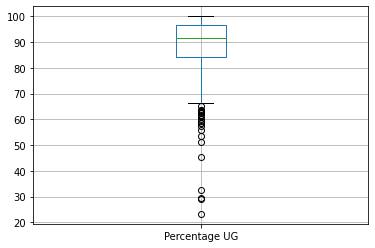

In [54]:
low_salary_college.boxplot(column='Percentage UG')
plt.show ()

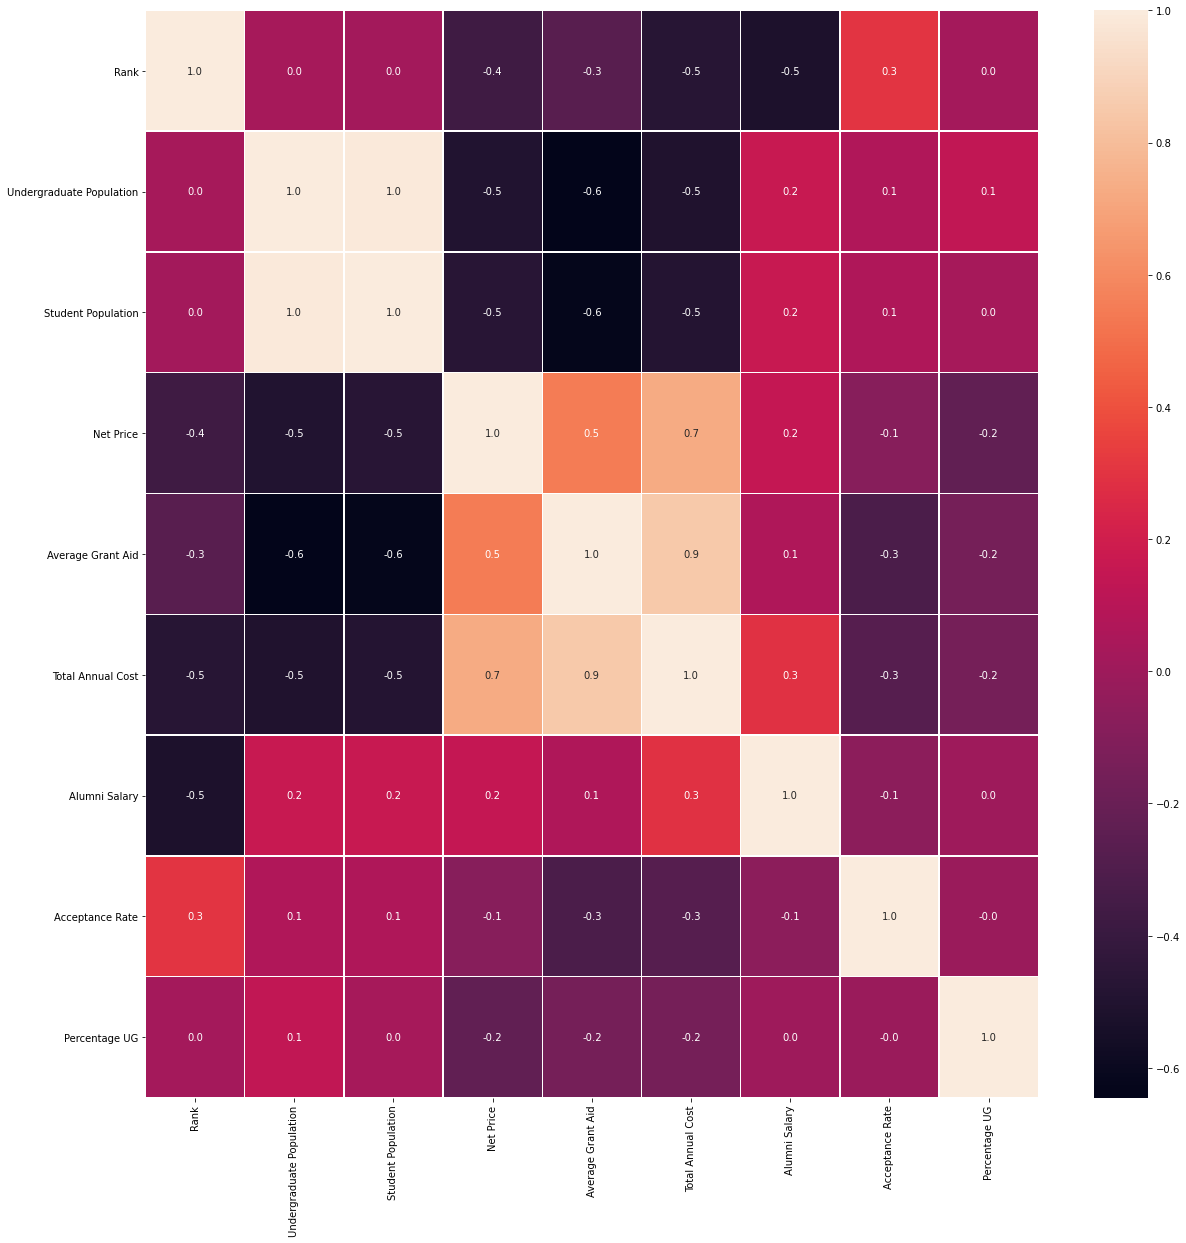

In [57]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(low_salary_college.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

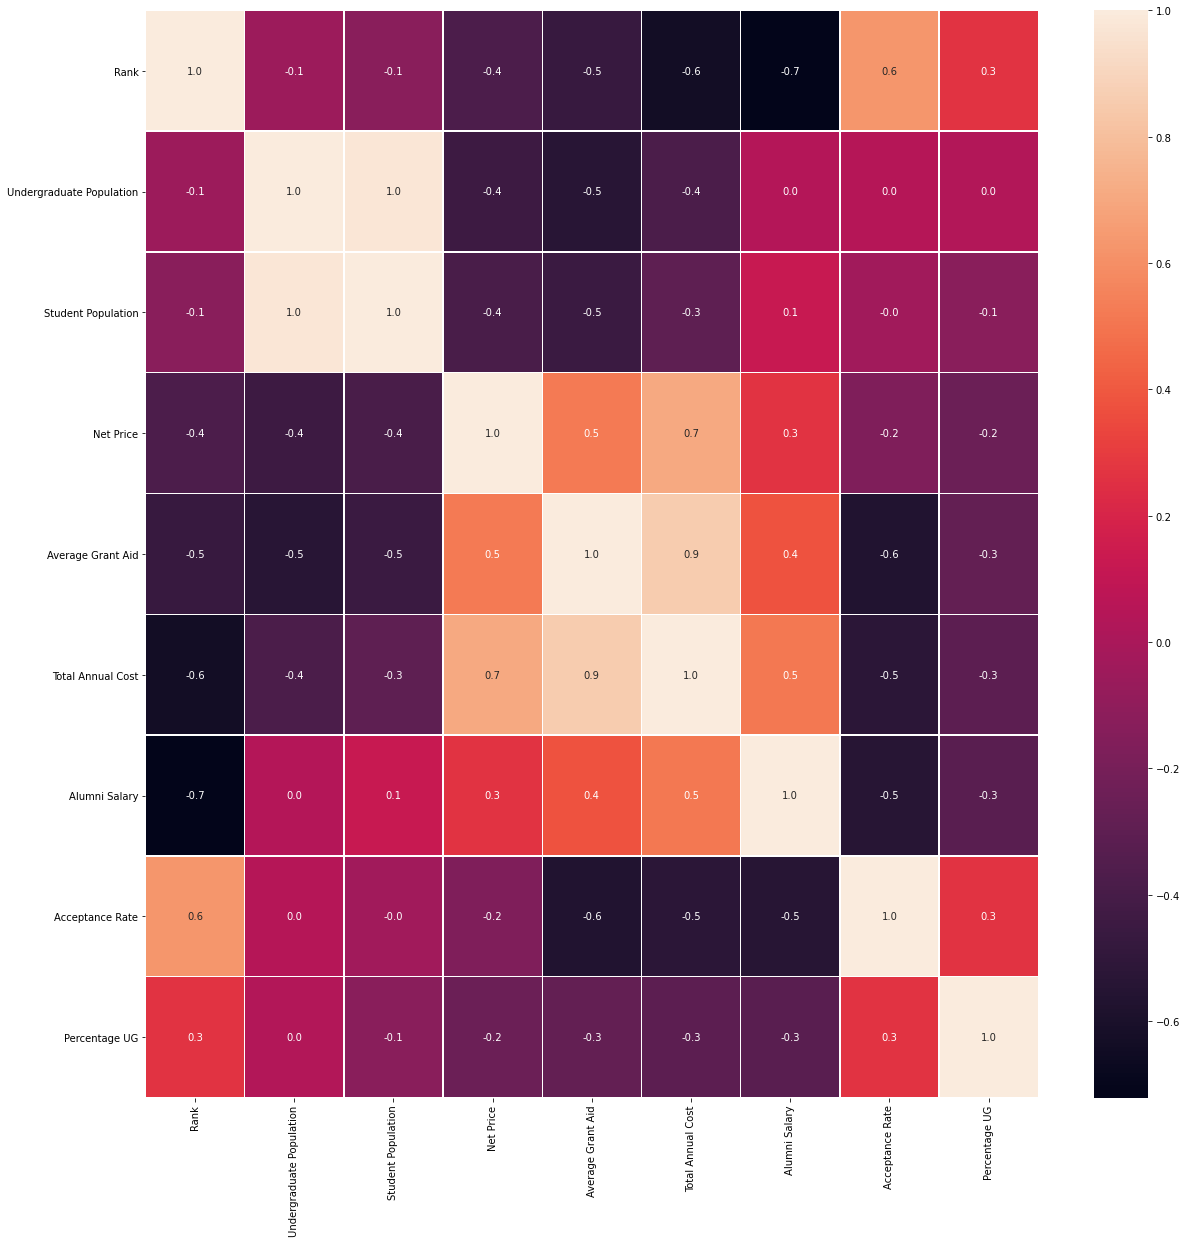

In [39]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(college1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

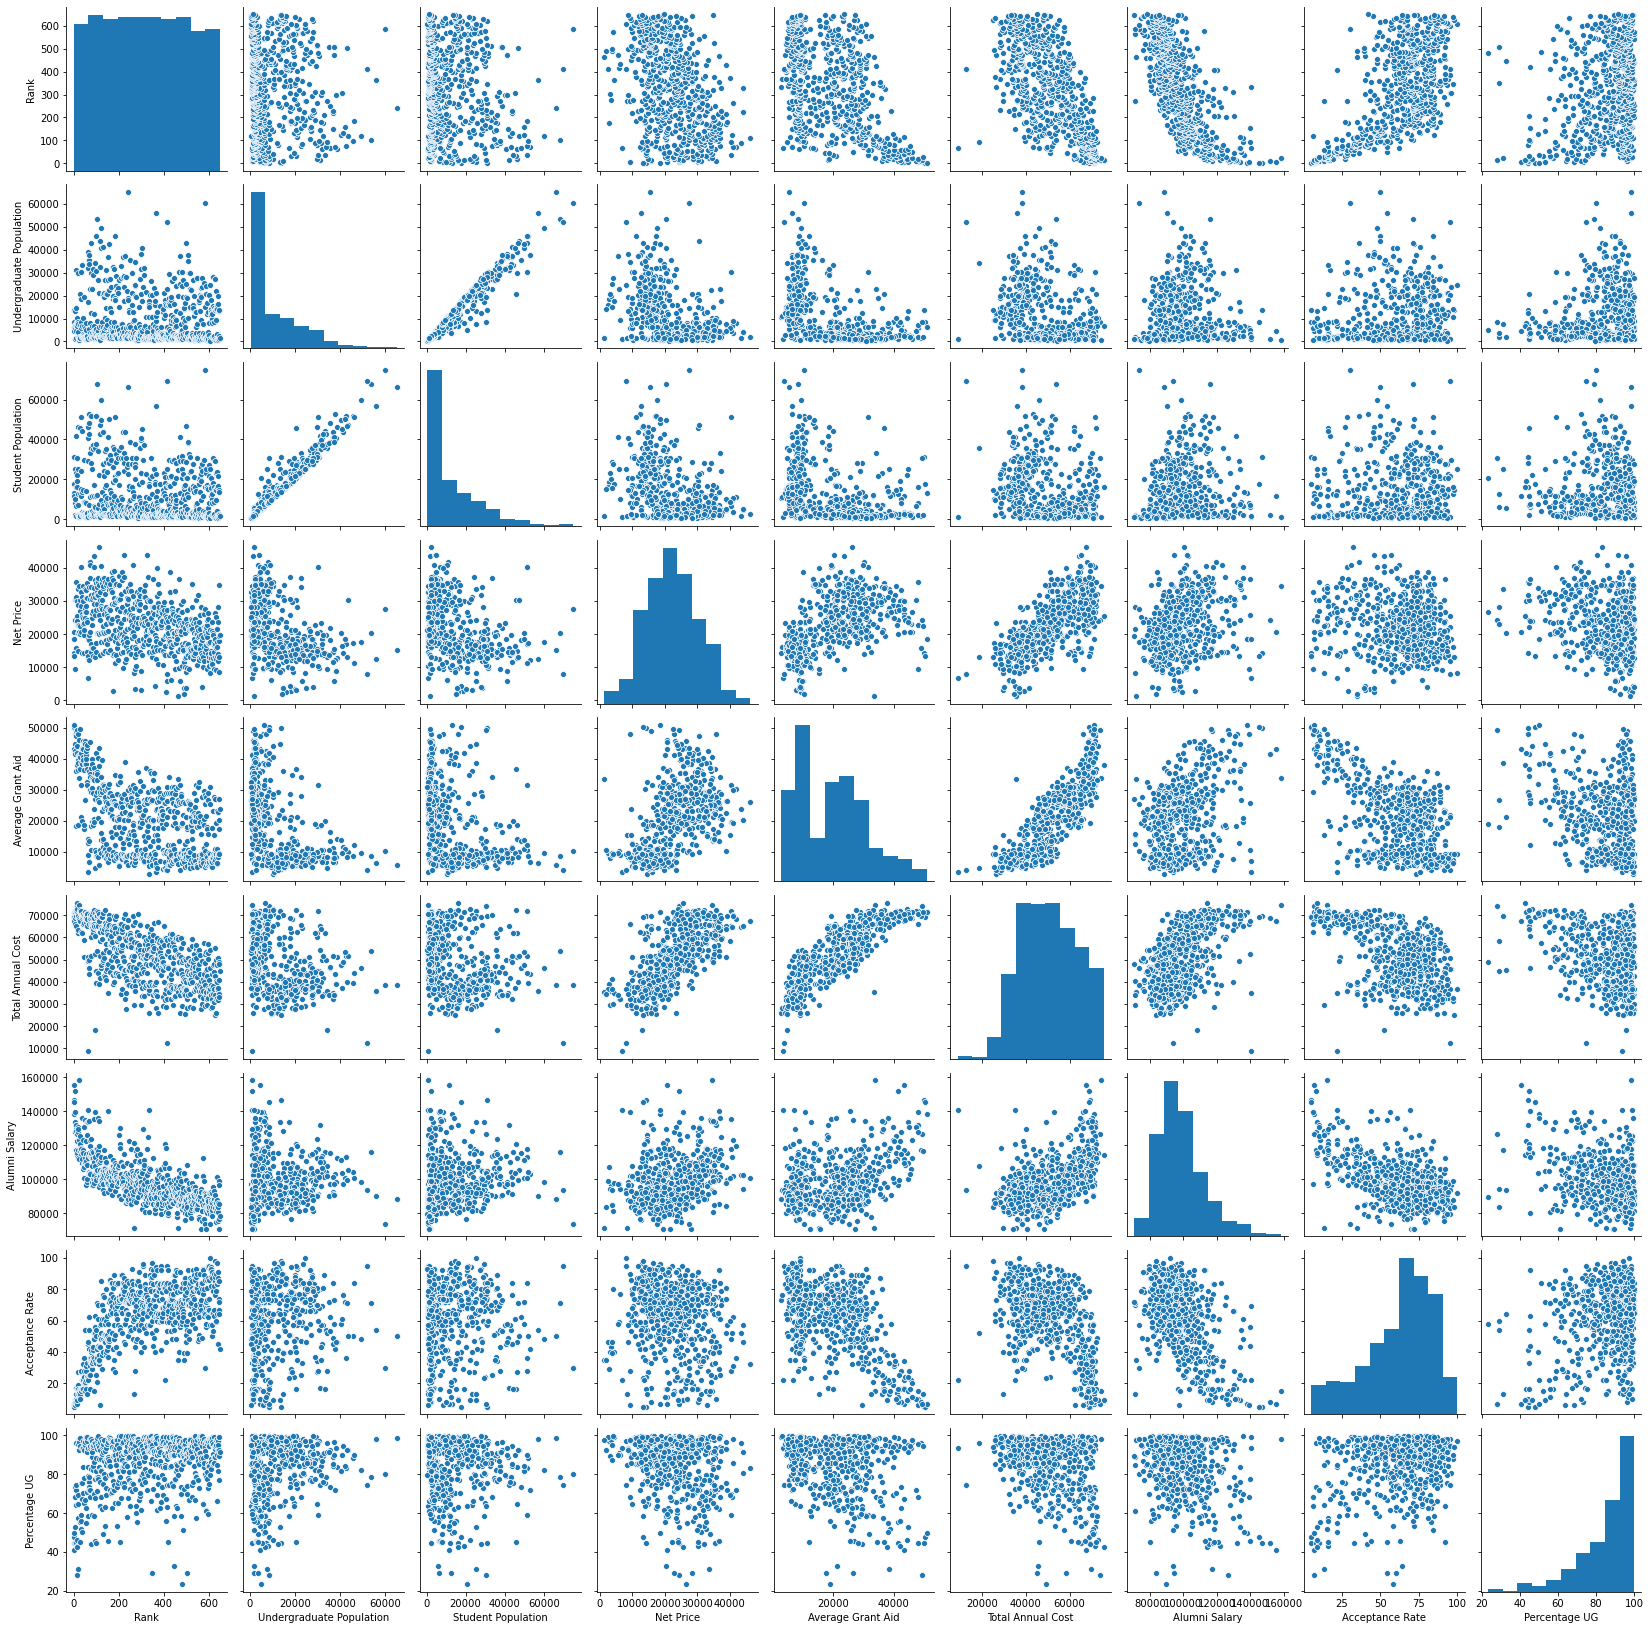

In [42]:
sns.pairplot(college1)

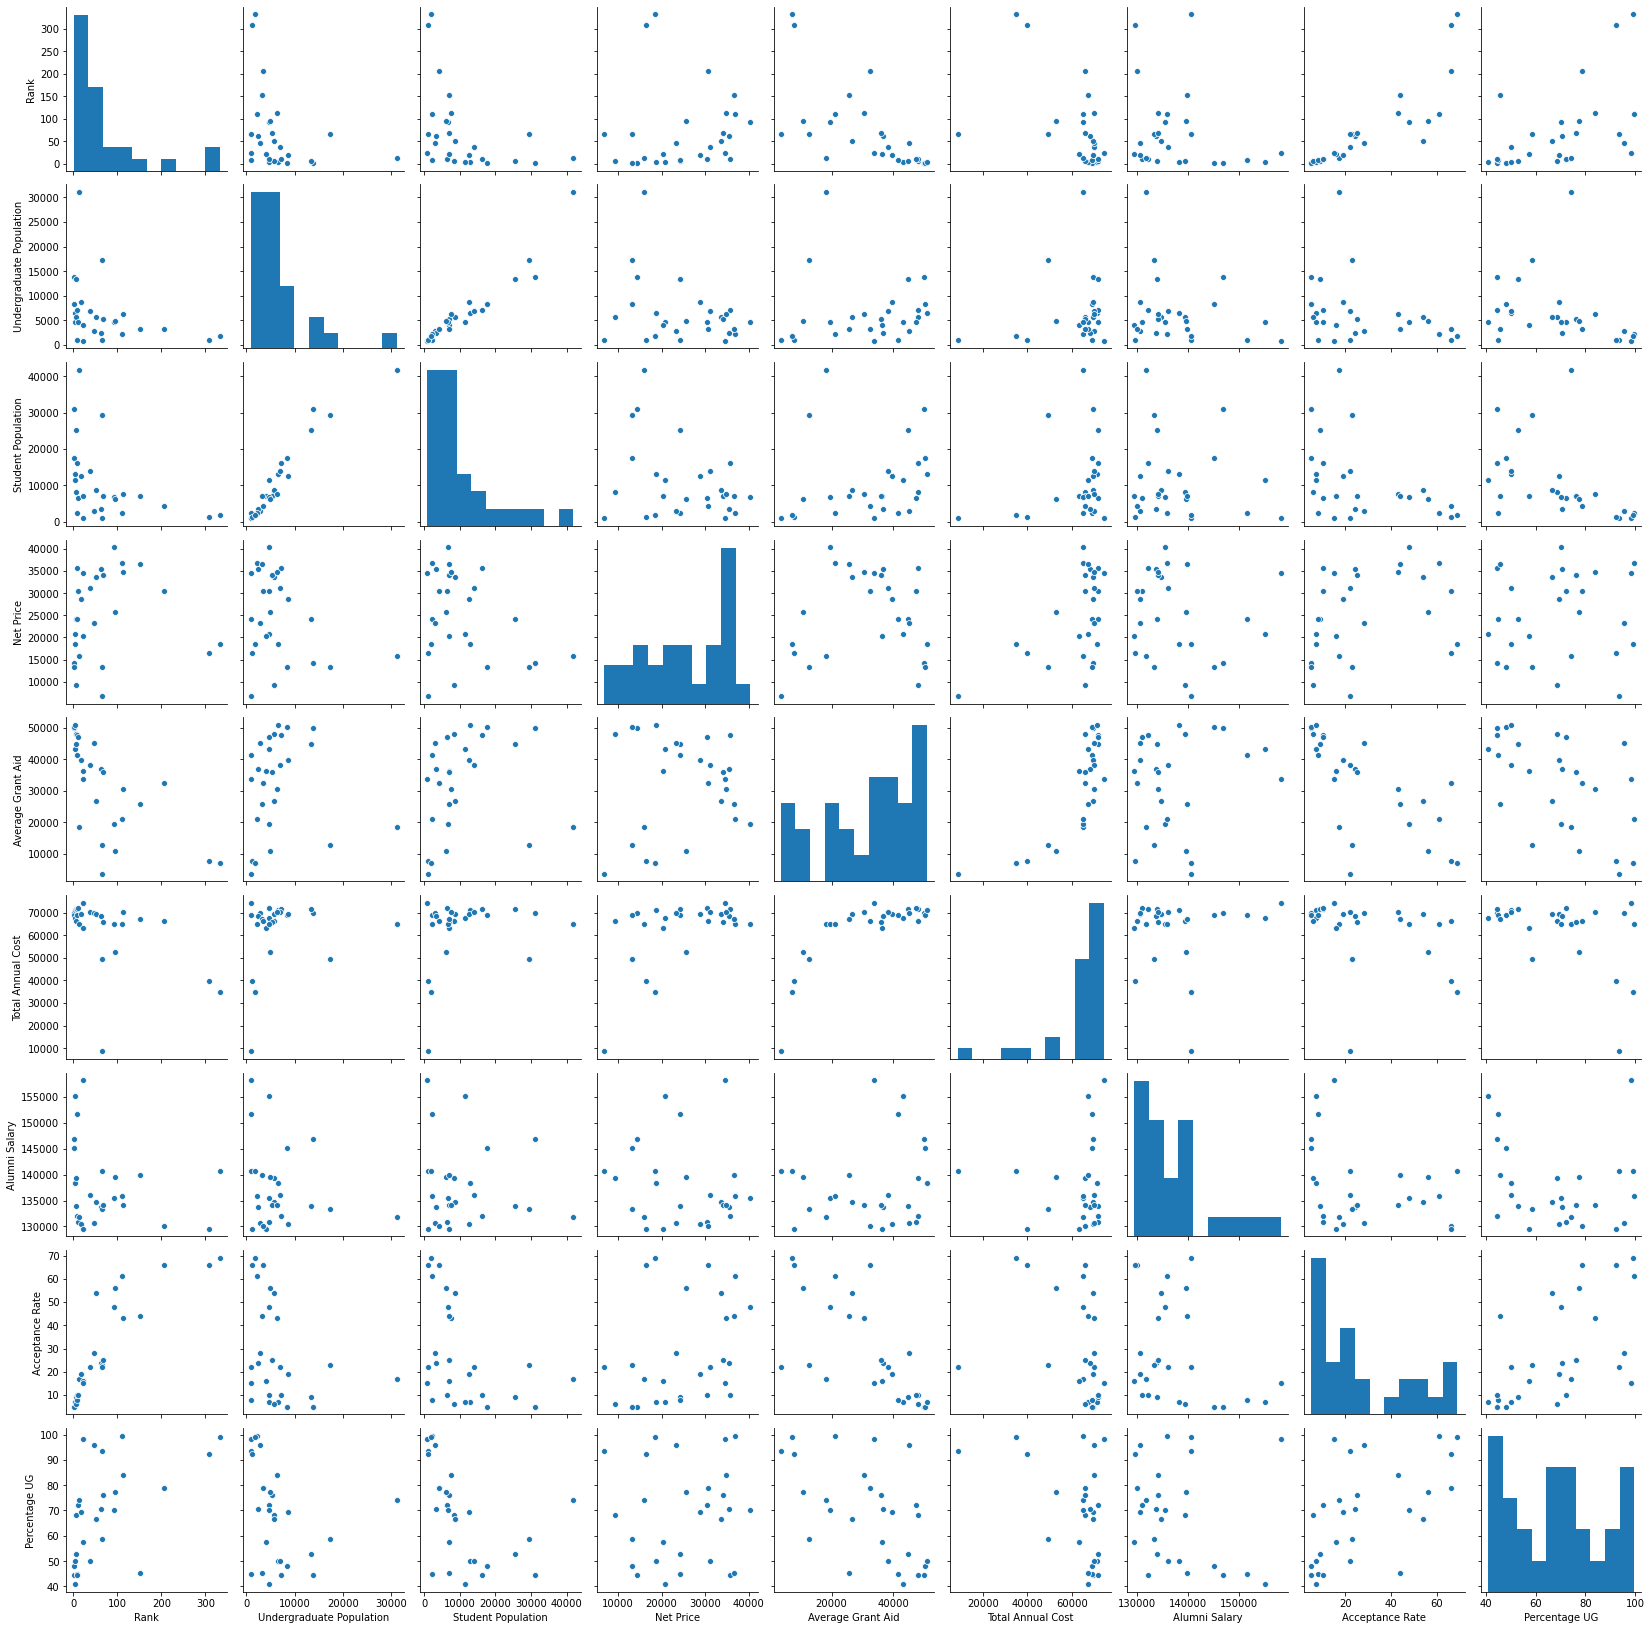

In [58]:
sns.pairplot(high_salary_college)

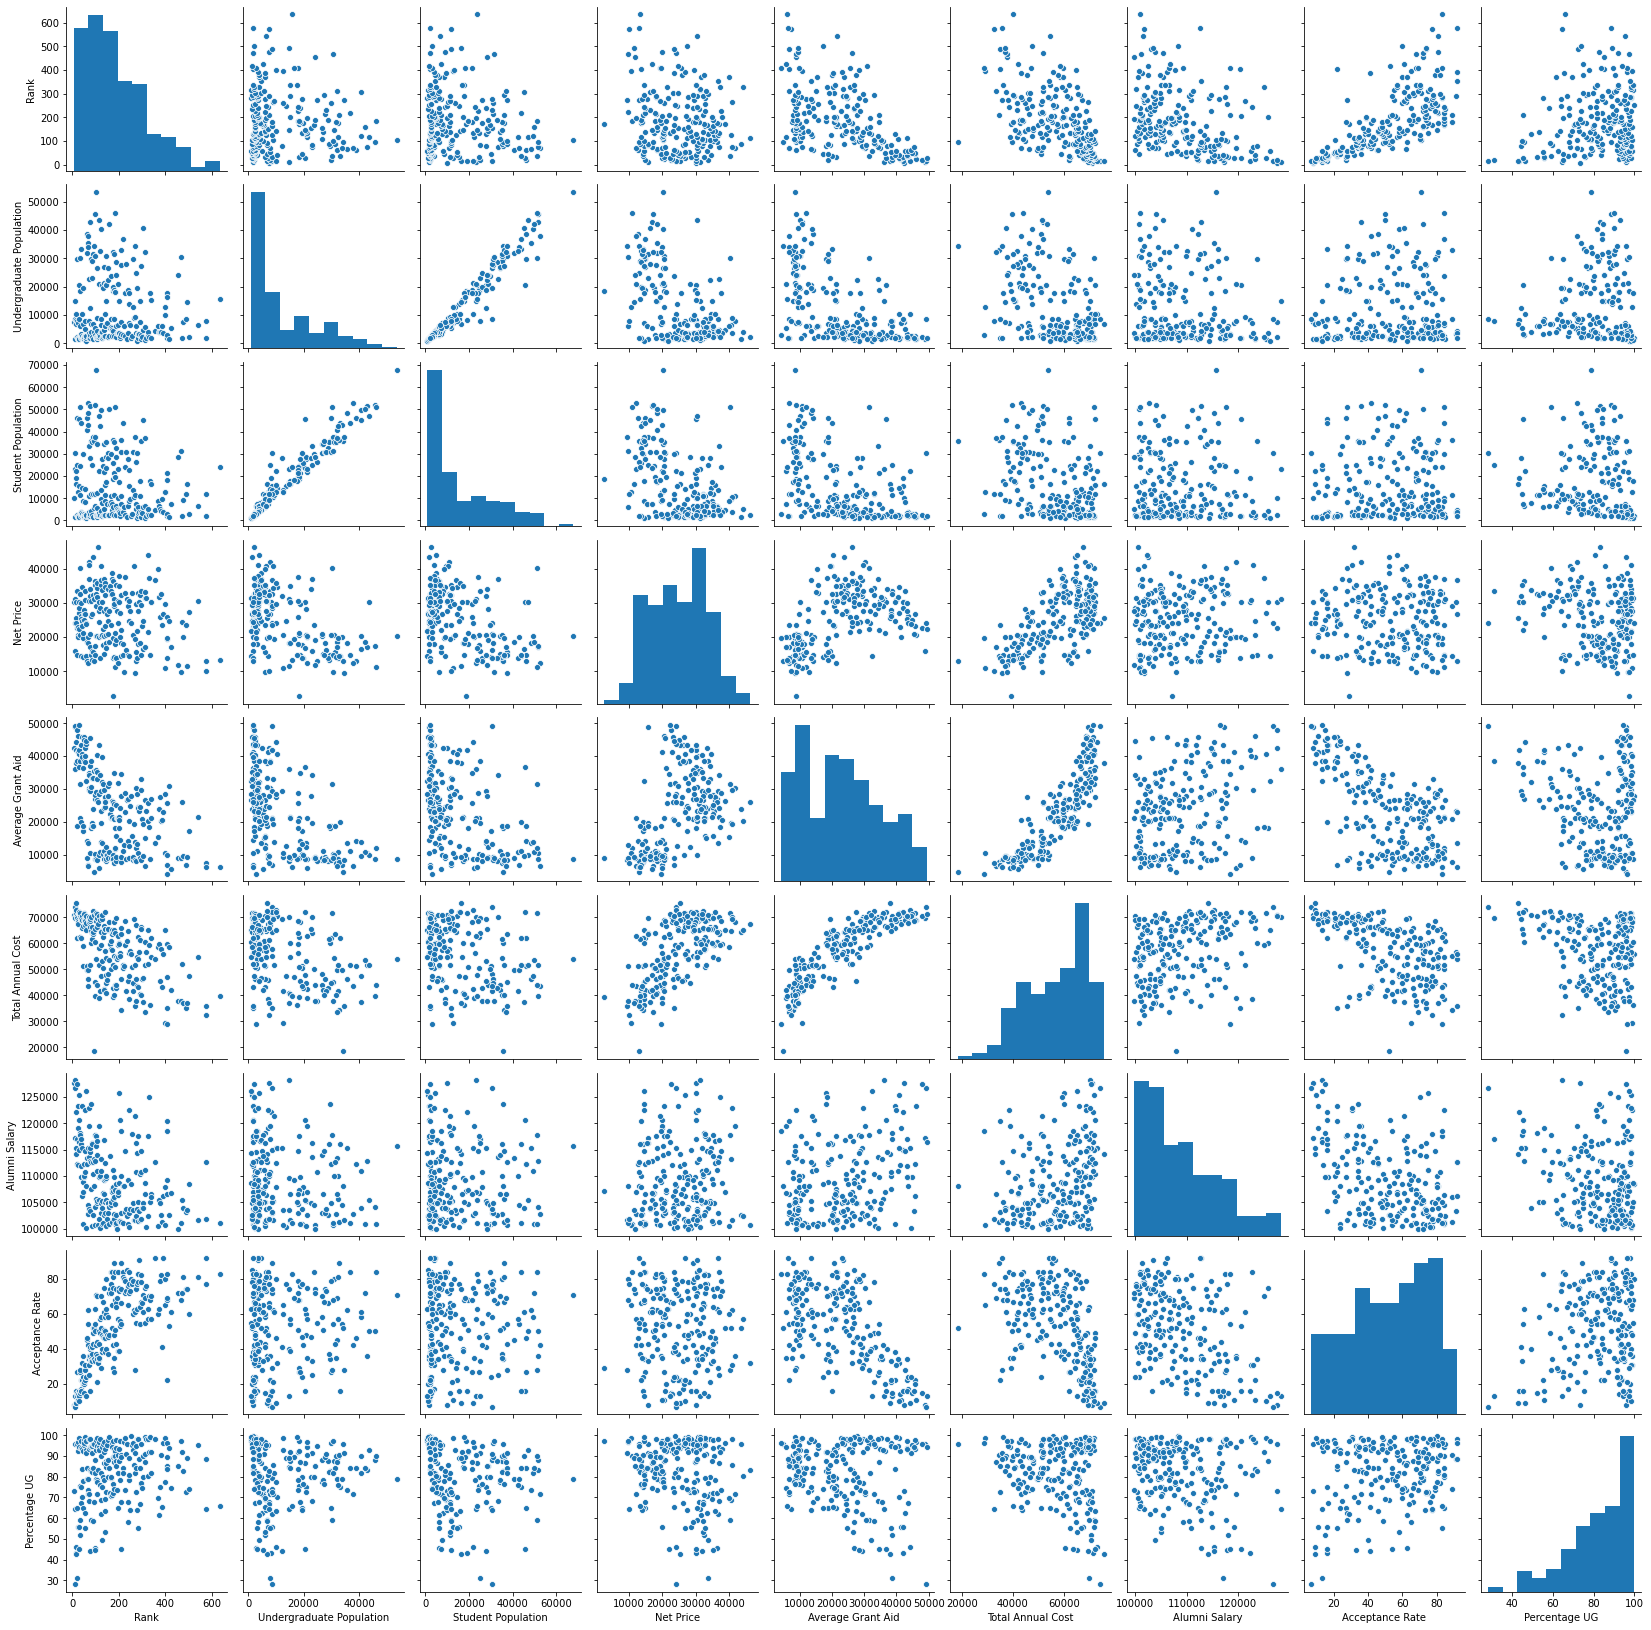

In [59]:
sns.pairplot(med_salary_college)

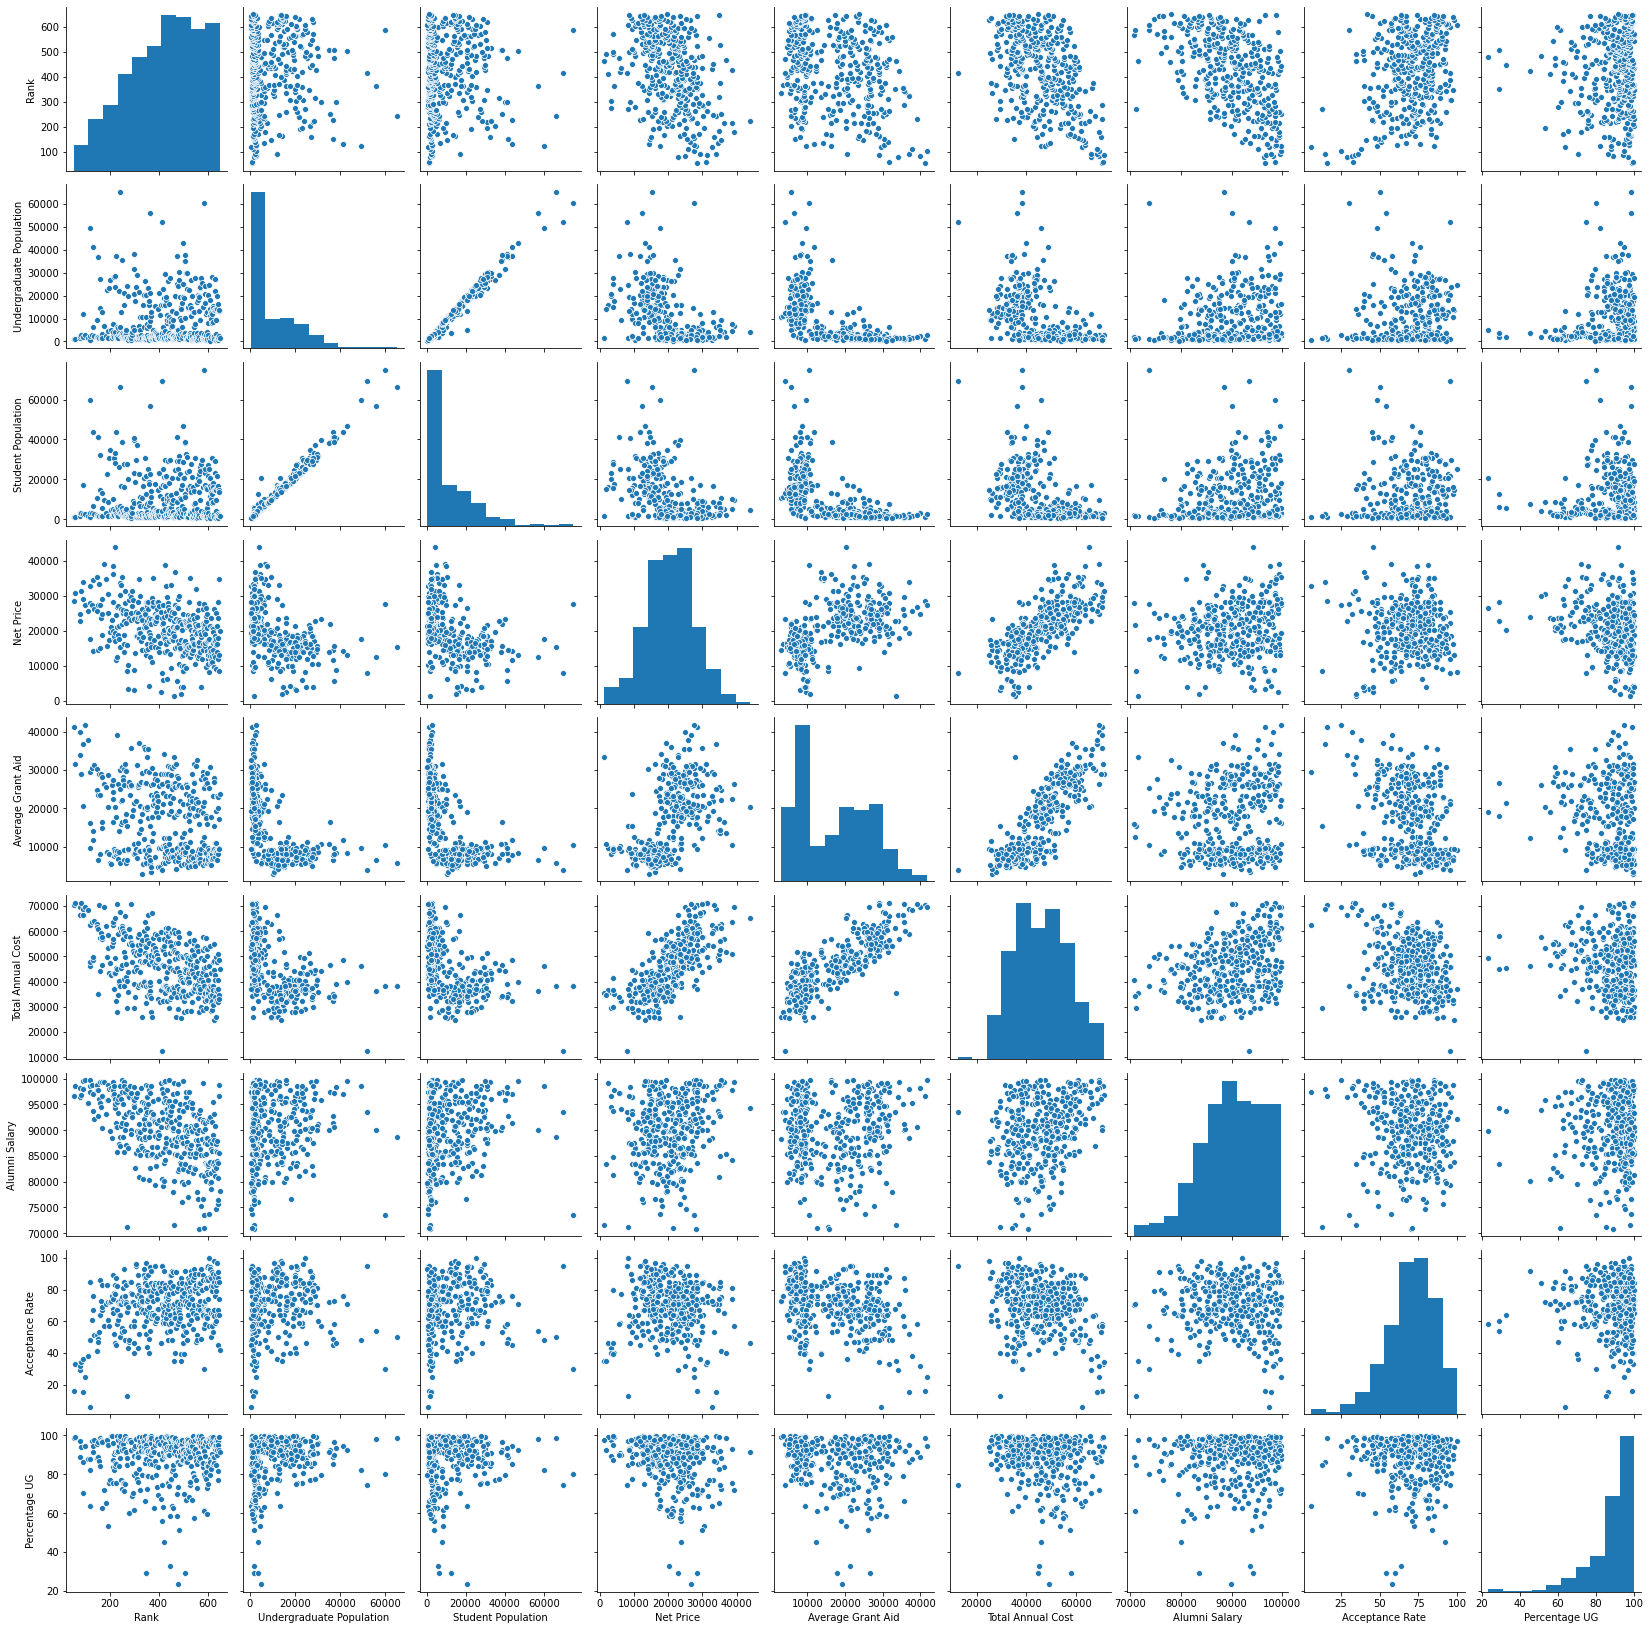

In [60]:
sns.pairplot(low_salary_college)